LOAN PAYBACK MODEL CREATION IN TENSORFLOW 
CLASSIFICATION MODEL
Containing missing datas

# OVERVIEW

LendingClub Dataset obtained Kaggle 

US peer - peer lending company

charge off/Default means loan not paid by the company


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_info = pd.read_csv('DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_names):
    print(data_info.loc[col_names]['Description'])

identifing the description of each column with a function

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


# The working data set provided

In [6]:
df = pd.read_csv('DATA/lending_club_loan_two.csv')

In [7]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


# Visualization
Exploratory Data Analusis

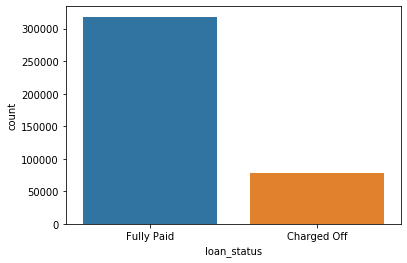

In [10]:
sns.countplot(x='loan_status',data=df)

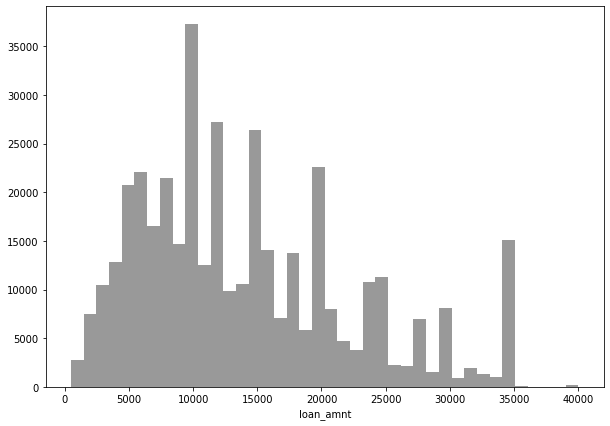

In [11]:
plt.figure(figsize=(10,7))
sns.distplot(df['loan_amnt'],bins=40,kde=False,color='black')

Correlation

In [12]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10, 0)

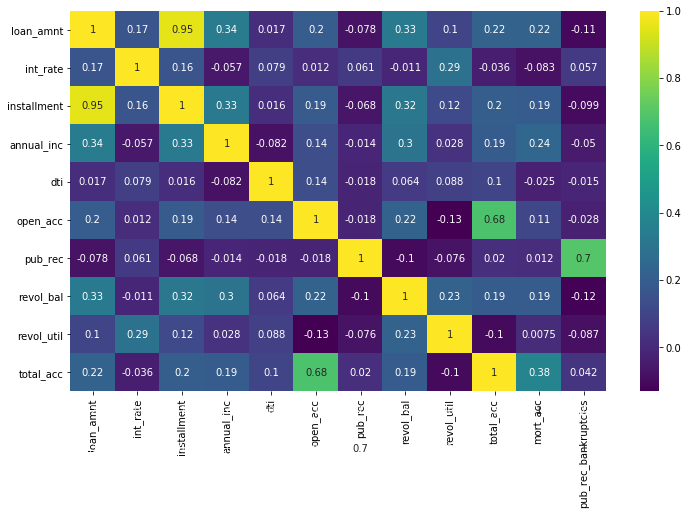

In [13]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot = True,cmap='viridis')
plt.ylim(10,0)

Loan amount has hign correlation with installement

In [14]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [15]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


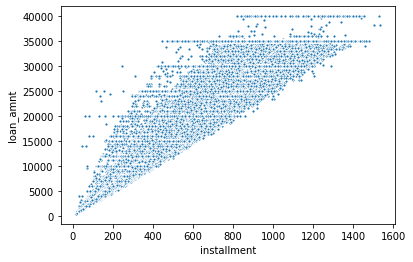

In [16]:
sns.scatterplot(data = df,x='installment',y='loan_amnt',marker='.')

Loan status vs Loan amount

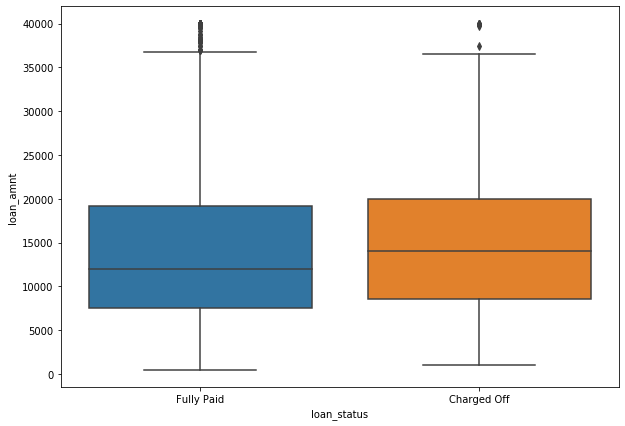

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

Slite increase in loan amount is causing charge off

reading values of the boxplot

In [18]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Grades and subgrades

In [19]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [20]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [21]:
feat_info('sub_grade')

LC assigned loan subgrade


grade vs loan status

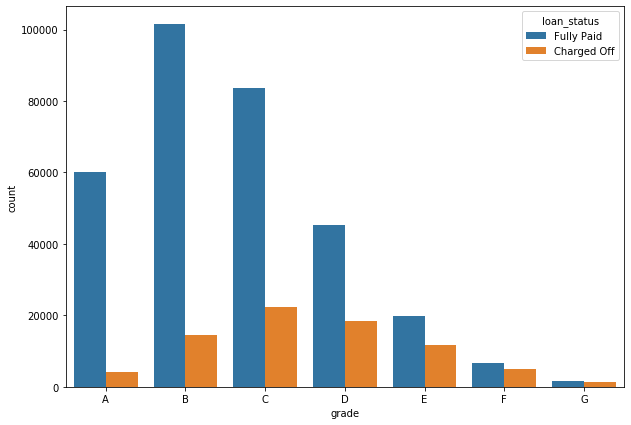

In [22]:
plt.figure(figsize=(10,7))
grade_order = sorted(df['grade'].unique())
sns.countplot(x='grade',data=df,hue='loan_status',order=grade_order)

subgrade vs loan staus & grade

ordering count plot

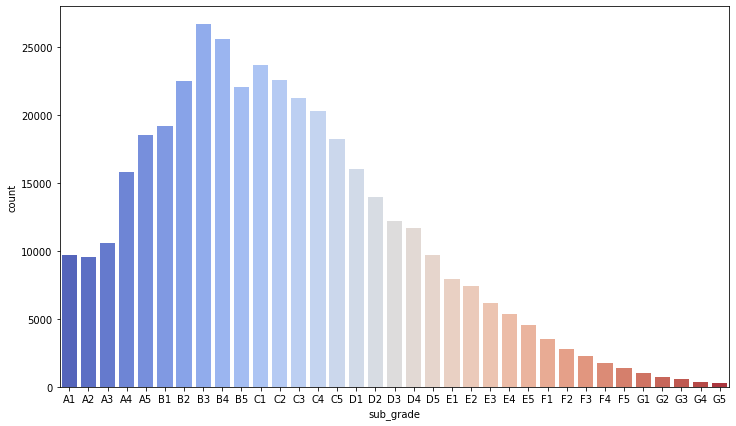

In [23]:
plt.figure(figsize=(12,7))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm')

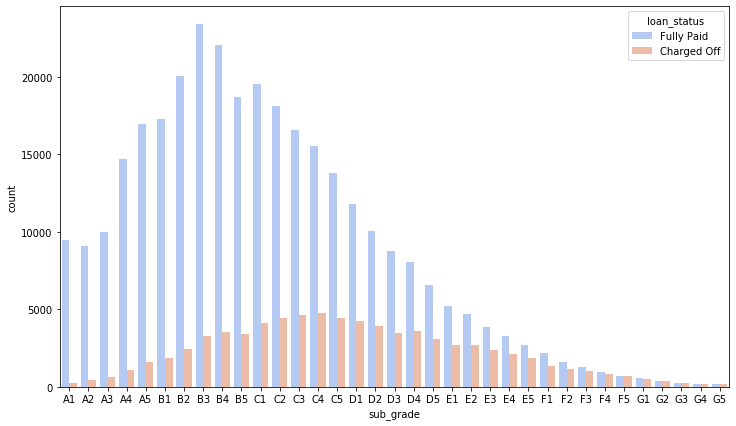

In [24]:
plt.figure(figsize=(12,7))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,hue='loan_status',order=subgrade_order,palette='coolwarm')

Zooming in 

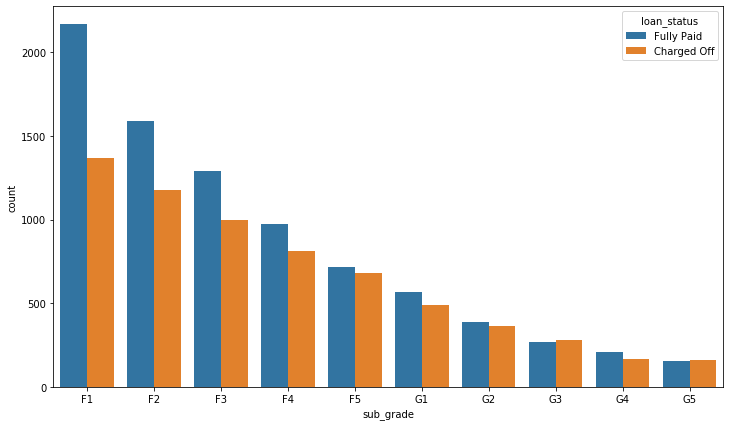

In [25]:
f_and_g = df[(df['grade'] == 'G') | (df['grade'] == 'F')]

plt.figure(figsize=(12,7))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,hue='loan_status',order=subgrade_order)

Loan status in to binary of 0  for charged off and 1 for fully paid

In [26]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [27]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


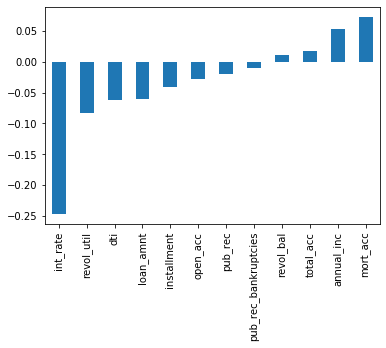

In [28]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

# Data Preprocessing

Keep the missing data or dropping the misiing data or else filling the missing datas

In [29]:
len(df)

396030

missing series 

In [30]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [31]:
100*df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

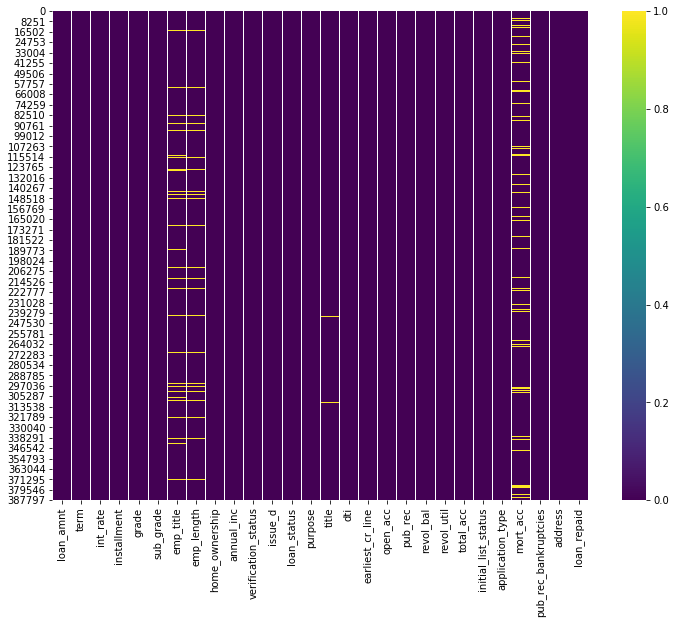

In [32]:
plt.figure(figsize = (12,9))
sns.heatmap(df.isnull(),cmap='viridis')

In [33]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


employment titles

In [34]:
df['emp_title'].nunique()

173105

In [35]:
df['emp_title'].value_counts()

Teacher                                 4389
Manager                                 4250
Registered Nurse                        1856
RN                                      1846
Supervisor                              1830
                                        ... 
Chief Operating Engineer                   1
Texas Rangers MLB Club                     1
Account Sales Manager                      1
Arkansas Utility Protection Services       1
Superintedent                              1
Name: emp_title, Length: 173105, dtype: int64

We cannot add a data into this 5% as so many unique jo titles so just removing it

In [36]:
df = df.drop('emp_title',axis=1)

Employment length

In [37]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [38]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [39]:
emp_length_order = ['< 1 year','1 year',
                    '2 years','3 years','4 years',
 '5 years', '6 years', '7 years', '8 years',
 '9 years','10+ years']

 

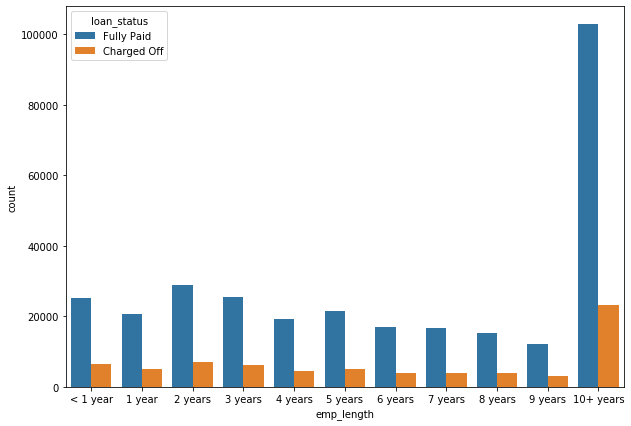

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

SO nothing from the figure so look at the data

In [41]:
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']

In [42]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']

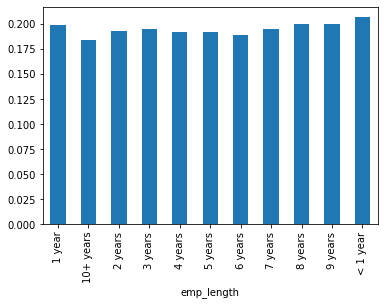

In [43]:
(emp_co/(emp_fp+emp_co)).plot(kind='bar')

NO mactual difference and it has less effect on loan repayment

In [44]:
df = df.drop('emp_length',axis=1)

what is purpose column

In [45]:
feat_info('purpose')

A category provided by the borrower for the loan request. 


title vs loan status

In [46]:
feat_info('title')

The loan title provided by the borrower


In [47]:
df['title'].head()

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

let us drop the title column

In [48]:
df = df.drop('title',axis=1)

In [49]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

Mort account vs loan status

In [50]:
feat_info('mort_acc')

Number of mortgage accounts.


In [51]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

lets find the column correlation with mort_acc column

In [52]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

total acc is correlating with mort acc

Total acc mean values of each is used to fill the missing data of the mort account columns

In [53]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [54]:
def fill_mort(total,mort):
    if np.isnan(mort):
        return total_acc_avg[total]
    else:
        return mort

In [55]:
df['mort_acc']= df.apply(lambda x: fill_mort(x['total_acc'],x['mort_acc']),axis=1)

dropinng the null values rows

In [56]:
feat_info('revol_bal')

Total credit revolving balance


In [57]:
feat_info('pub_rec_bankruptcies')

Number of public record bankruptcies


In [58]:
df = df.dropna()

# Categorical Data and string data 
whether to do one hot encoding or leave it

In [60]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [61]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


# Term column

In [62]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

so numeric values of 36 and 60 so lets keep them as numeric

In [63]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [64]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

Grade 

it is already explained by subgrade so lets drop it

In [66]:
df = df.drop('grade',axis=1)

# Sub grade column

In [68]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [73]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

# Verification status, application type, Initial list status and purpose

In [74]:
dummies = pd.get_dummies(df[['verification_status','initial_list_status','application_type','purpose']],drop_first=True)
df = pd.concat([df.drop(['verification_status','initial_list_status','application_type','purpose'],axis=1),dummies],axis=1)

# Home Ownership

In [76]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

replace none and other with the others

In [77]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [78]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [79]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

# Address column

In [83]:
#df['address'].apply(lambda add: add[-5:])
df['zipcode'] = df['address'].apply(lambda add: add[-5:])

In [84]:
df['zipcode'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zipcode, dtype: int64

LESS number of zipcode so we can do one hot encoding on in IT

In [85]:
dummies = pd.get_dummies(df['zipcode'],drop_first=True)
df = pd.concat([df.drop('zipcode',axis=1),dummies],axis=1)

In [86]:
df = df.drop('address',axis=1)

# Issue_date column

In [87]:
feat_info('issue_d')

The month which the loan was funded


this is data leakage so drop it

In [88]:
df = df.drop('issue_d',axis=1)

# EARLIEST CREDIT TIME COLUMN

In [89]:
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [ ]:
#df['earliest_cr_line']
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda date: int(date[-4:]))

In [96]:
df['earliest_cr_line'].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1948        1
1944        1
Name: earliest_cr_line, Length: 65, dtype: int64

# DATA PREPROCESSING AND SCALLING OF DATA

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
df =df.drop('loan_status',axis=1)

In [99]:
X = df.drop('loan_repaid',axis=1).values
y= df['loan_repaid'].values

You can do a sampling of the the data as follows
df = df.sample(frac=0.1,random_state=101)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

Normalizing/scaling

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
scaler = MinMaxScaler()

In [103]:
X_train = scaler.fit_transform(X_train)

In [105]:
X_test = scaler.transform(X_test)

# Model Creation 

In [107]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout

Model building

In [108]:
X_train.shape

(316175, 78)

In [118]:
from tensorflow.keras.callbacks import EarlyStopping

In [165]:
#help(EarlyStopping)

In [166]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [168]:
model.fit(x=X_train,y= y_train,epochs=30,batch_size=200,
         validation_data=(X_test,y_test))

Train on 316175 samples, validate on 79044 samples
Epoch 1/30
316175/316175 [==============================] - 12s 38us/sample - loss: 0.2618 - val_loss: 0.2628
Epoch 2/30
186600/316175 [================>.............] - ETA: 4s - loss: 0.2606

KeyboardInterrupt: 

In [ ]:
model.save('Loan Repaing Model.h5')

In [152]:
losses = pd.DataFrame(model.history.history)

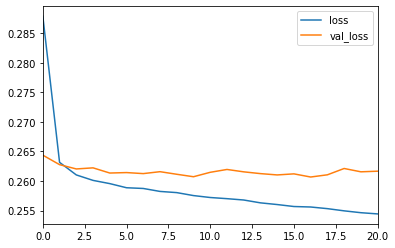

In [153]:
losses.plot()

Prediction

In [154]:
from sklearn.metrics import classification_report, confusion_matrix

In [155]:
#not predict
predict = model.predict_classes(X_test)

In [156]:
print(classification_report(y_test,predict))
print('/n')
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.96      0.46      0.62     15658
           1       0.88      0.99      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.73      0.78     79044
weighted avg       0.90      0.89      0.87     79044

/n
[[ 7133  8525]
 [  330 63056]]


As the labels are impalanced so it failed in predicting not repaid 

though the model is 80 % accurate it really fails in due to impanced data

recall is sufferening at 46% and the F1 scor is 62% 

# Random Input to predict the output

In [157]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt      25000.00
term              60.00
int_rate          18.24
installment      638.11
annual_inc     61665.00
                 ...   
30723              1.00
48052              0.00
70466              0.00
86630              0.00
93700              0.00
Name: 305323, Length: 78, dtype: float64

In [160]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

In [163]:
model.predict(new_customer)

array([[0.5551272]], dtype=float32)